# Part I - Ford Gobike Trip Data Exploration
## by Salima Omari

## Introduction
Ford GoBike is the Bay Area's bike share available in San Francisco, San Jose, and the East Bay which help connect people to work, friends and places. Thousands of bikes are available to be picked up and droped off anywhere. No schedule. No rails. Ride your way. This dataset includes information about individual rides made in a bike-sharing system by Ford covering the greater San Francisco Bay area in 2018.
 
## Preliminary Wrangling

### Data gathering
This data was directly downloading from <a href="https://s3.amazonaws.com/fordgobike-data/index.html">here</a>. Each month's data were downloaded individually. They will merged together before being used to perform analysis.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
# Load dataset by joining all individual monthly data to one dataframe
nums=['02','03','04','05','06','07','08','09','10','11','12']
trip_data=pd.read_csv('201801-fordgobike-tripdata.csv')
for i in nums:
    df=pd.read_csv('2018'+i+'-fordgobike-tripdata.csv')
    trip_data=pd.concat([trip_data, df])
    
trip_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.000000000,Mission Dolores Park,37.761420500,-122.426435300,285.000000000,Webster St at O'Farrell St,37.783520835,-122.431157827,2765,Subscriber,1986.000000000,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.000000000,San Francisco Ferry Building (Harry Bridges Pl...,37.795392000,-122.394203000,15.000000000,San Francisco Ferry Building (Harry Bridges Pl...,37.795392000,-122.394203000,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.000000000,Jackson St at 5th St,37.348758687,-121.894797832,296.000000000,5th St at Virginia St,37.325998400,-121.877120000,3039,Customer,1996.000000000,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.000000000,Market St at Franklin St,37.773793206,-122.421239018,47.000000000,4th St at Harrison St,37.780954600,-122.399749160,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.000000000,Laguna St at Hayes St,37.776434819,-122.426244020,19.000000000,Post St at Kearny St,37.788975000,-122.403452000,617,Subscriber,1991.000000000,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131358,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.000000000,Hubbell St at 16th St,37.766474215,-122.398295403,81.000000000,Berry St at 4th St,37.775880000,-122.393170000,3035,Subscriber,1982.000000000,Female,No
131359,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.000000000,Washington St at Kearny St,37.795392937,-122.404770255,58.000000000,Market St at 10th St,37.776619000,-122.417385000,2034,Subscriber,1999.000000000,Female,No
131360,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.000000000,Downtown Berkeley BART,37.870139000,-122.268422000,255.000000000,Virginia St at Shattuck Ave,37.876572549,-122.269527912,2243,Subscriber,1991.000000000,Male,No
131361,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.000000000,4th St at Mission Bay Blvd S,37.770407400,-122.391198400,126.000000000,Esprit Park,37.761634300,-122.390647700,545,Subscriber,1963.000000000,Male,No


In [3]:
#Check for duplicates
trip_data.duplicated().sum()

0

### Structure of dataset

There are 1,863,721 bike trips covered the dataset with 15 variables which are the **duration_sec, start_time, end_time,	start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name,	end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year,	member_gender and bike_share_for_all_trip**. Variables have both categorical and numeric nature.

### Main feature(s) of interest in the dataset

Discovering factors and features that influence bike trips in San Francisco which will thereby help in improving easier access to smooth bike rides.

### Features in the dataset that could help support this investigation into the feature(s) of interest
The time of the year will have the strongest effect on the frequency of trips. It is also expected that some days will effect of the number of trips that would occur. The bike riding trips will be more prevalent in some age groups than others, for instance, younger kids would be unlikely to take trips and the number of trips will not be as frequent with the older people.

### Data assessing

In [4]:
trip_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  member_birth_year        1753003 non-null  

###### Quality issues
- Missing values in columns start_station_id,start_station_name, end_station_id,end_station_name, member_birth_year,member_gender.
- Wrong datatypes in columns start_time,end_time, start_station_id, end_station_id,bike_id, member_birth_year


### Data cleaning

**Issue 1**: Missing values in columns start_station_id,start_station_name, end_station_id,end_station_name, member_birth_year,member_gender.<br>
**Define**: Drop all missing values as they are quite few<br>
**Code**

In [5]:
# drop all missing values
trip_data=trip_data.dropna()

**Issue 2**: Wrong datatypes in columns start_time,end_time, start_station_id, end_station_id,bike_id, member_birth_year<br>
**Define**: Assign appropriate datatypes to the columns<br>
**Code**

In [6]:
# convert the 'start_time' and 'end_time' columns to datetime format
import warnings
warnings.filterwarnings("ignore")

trip_data['start_time']= pd.to_datetime(trip_data['start_time'])
trip_data['end_time']= pd.to_datetime(trip_data['end_time'])

In [7]:
# Create new column for user age from their birth year
from datetime import date

current_year = date.today().year
trip_data['user_age']=current_year-trip_data['member_birth_year']

# convert the new column to integar datatype
trip_data['user_age'] = trip_data['user_age'].astype(int)

In [8]:
# convert start_station_id, end_station_id,bike_id columns to string datatype
trip_data['start_station_id'] = trip_data['start_station_id'].astype(str)
trip_data['end_station_id'] = trip_data['end_station_id'].astype(str)
trip_data['bike_id'] = trip_data['bike_id'].astype(str)

In [9]:
# change the trip duration time from seconds to minutes
trip_data['trip_duration(mins)']= trip_data['duration_sec']/60
trip_data['trip_duration(mins)'] = trip_data['trip_duration(mins)'].astype(int)

**Test**

In [10]:
trip_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 131361
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1741556 non-null  int64         
 1   start_time               1741556 non-null  datetime64[ns]
 2   end_time                 1741556 non-null  datetime64[ns]
 3   start_station_id         1741556 non-null  object        
 4   start_station_name       1741556 non-null  object        
 5   start_station_latitude   1741556 non-null  float64       
 6   start_station_longitude  1741556 non-null  float64       
 7   end_station_id           1741556 non-null  object        
 8   end_station_name         1741556 non-null  object        
 9   end_station_latitude     1741556 non-null  float64       
 10  end_station_longitude    1741556 non-null  float64       
 11  bike_id                  1741556 non-null  object        
 12  u

The dataframe has no column for distance covered each trip, which should be an important feature to carry out investigations on this dataset, it will be created using the locations of the the start and end stations

In [11]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)
trip_data.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,user_age,trip_duration(mins)
count,1741556.000000000,1741556.000000000,1741556.000000000,1741556.000000000,1741556.000000000,1741556.000000000,1741556.000000000,1741556.000000000
mean,772.862368480,37.768772223,-122.351117472,37.768869072,-122.350558494,1983.060789317,38.939210683,12.389526952
std,1943.048008216,0.101566264,0.119366299,0.101413327,0.118772852,10.451329049,10.451329049,32.385292988
min,61.000000000,37.263310000,-122.473658000,37.263310000,-122.473658000,1881.000000000,22.000000000,1.000000000
25%,344.000000000,37.771058000,-122.411402900,37.771058000,-122.409449369,1978.000000000,31.000000000,5.000000000
50%,543.000000000,37.781073700,-122.397086000,37.781270000,-122.395935617,1985.000000000,37.000000000,9.000000000
75%,839.000000000,37.797280000,-122.287610200,37.797280000,-122.289415400,1991.000000000,44.000000000,13.000000000
max,86281.000000000,37.880222446,-121.833332000,37.880222446,-121.833332000,2000.000000000,141.000000000,1438.000000000


## Univariate Analysis

From the statistical summary above, the oldest user is 141 years old which is quite very old, a very rare or an impossible case even, a box plot will be plotted to check for outliers in the age column.

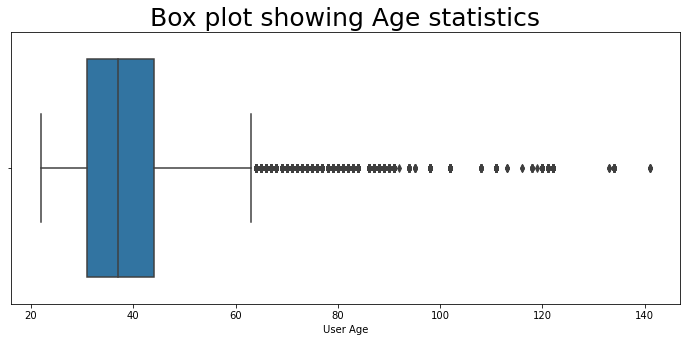

In [12]:
plt.figure(figsize=[12, 5])
sns.boxplot(x=trip_data["user_age"])

plt.xlabel('User Age')

plt.title('Box plot showing Age statistics',fontsize=25)
plt.show()

The box plot shows outliers from around age 62, however for this project we will be dropping ages above 80. The choice of this is due to the fact that the likelihood for ages above 80 to take bike trips is quite very rare. With this we will like to see how the age distribution of users look like.

In [13]:
# get rows with ages less than 81
trip_data=trip_data[trip_data['user_age']<81]

In [14]:
def CreateHistplot(x,bins,xlabel):
    plt.figure(figsize=[12, 5])
    plt.hist(data = trip_data, x = x, bins = bins)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel('Number of trips',fontsize=15)
    plt.title('Distribution of {}'.format(xlabel),fontsize=25)
    
    
    

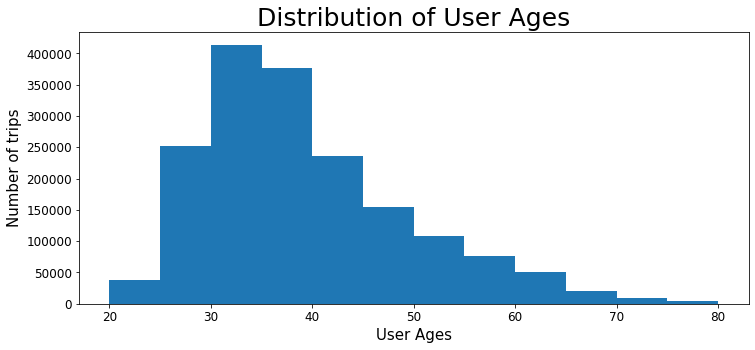

In [15]:
#### How does the Age distribution of users look like ?

binsize = 5
bins = np.arange(20, trip_data['user_age'].max()+binsize, binsize)

CreateHistplot('user_age',bins,'User Ages')


The most frequent users fall between the age of **30-35** after which the frequency of users seem to reduce as the user age increases. Teenagers do not seem to be part of the users and there are quite few users above 80 still going on trips.

The distribution of the trip duration should be looked at as well

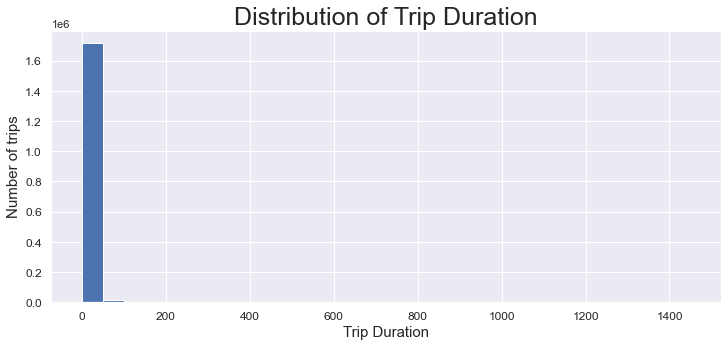

In [16]:
bins = np.arange(0, 1500, 50)
sns.set(font_scale=1)
CreateHistplot('trip_duration(mins)',bins,'Trip Duration')


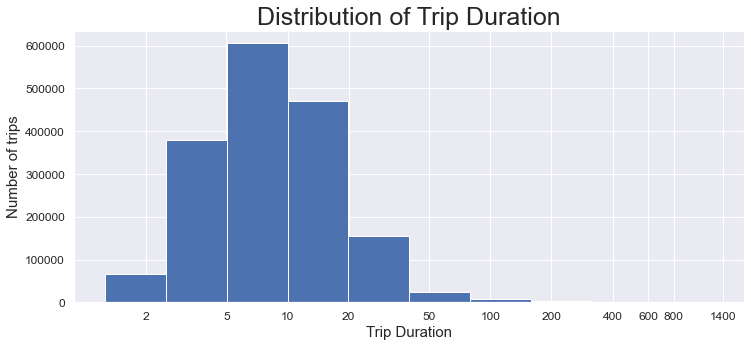

In [17]:
bins = 10 ** np.arange(0.1, 3.2, 0.3)

CreateHistplot('trip_duration(mins)',bins,'Trip Duration')
plt.xscale('log')
plt.xticks([2,5,10,20,50,100,200,400,600,800,1400], [2,5,10,20,50,100,200,400,600,800,1400],fontsize=12)

plt.show()

Looking at the log scale, it is can seen that the distribution is skewed to the left. Users mostly have short trips between **5 and 10 mins**. Very few users go for long trips above 50 minutes. It can observe that there are possible outliers, however we will not be dropping it as it poses to be a significant part of long trips. 
Moving forward We will like to find answer to some questions.  

#### What is the frequency distrution of trips in each month of the year and what days have more trips?

In [18]:
trip_data['day_of_Week'] = trip_data['end_time'].dt.day_name()
trip_data['month'] = trip_data['end_time'].dt.month_name()
trip_data['date'] = trip_data['end_time'].dt.date
trip_data['hour'] = trip_data['start_time'].dt.hour

In [19]:
def CreateCountPlot(df,x,title, ax=None, order=None,hue=None,palette = None):
    
    sns.countplot(data=df, x=x,color='indigo',ax=ax,order=order,hue=hue,palette = palette);
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(x,fontsize=15)
    plt.ylabel('Counts',fontsize=15)
    plt.title(title,fontsize=25)
  

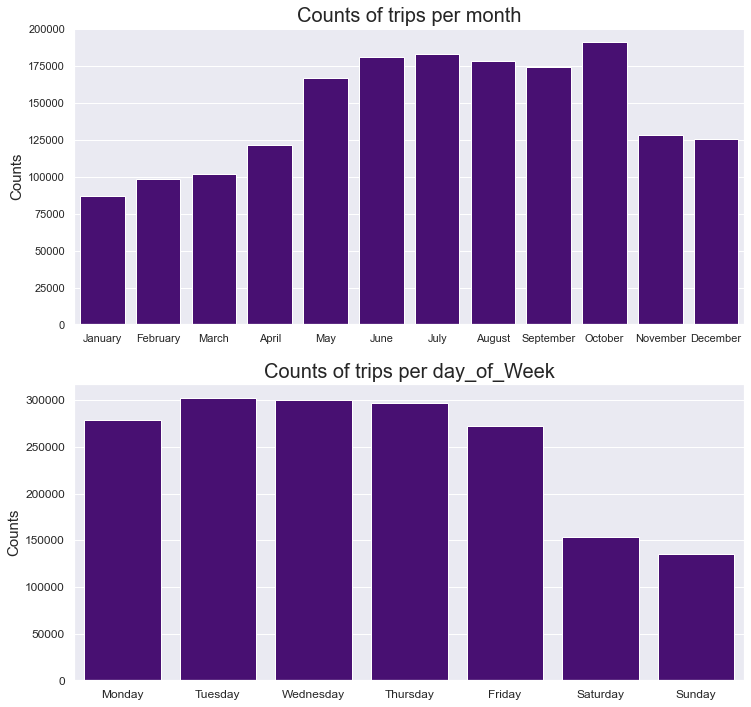

In [20]:
fig, ax = plt.subplots(nrows=2, figsize = [12,12])
x=['month','day_of_Week']
order=[['January','February','March','April','May','June','July','August','September','October','November','December'],
      ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
default_color = sns.color_palette()[0]
for i in range (2):
    CreateCountPlot(trip_data,x[i],'Counts of trips per {}'.format(x[i]), ax = ax[i],order=order[i],hue=None)
    ax[i].set_title('Counts of trips per {}'.format(x[i]), fontsize=20)
    ax[i].set(xlabel=None);
    ax[i].set_ylabel('Counts', fontsize=15)


It is observed that more trips happen between **May till October** of which October has the most frequent trip, while there is less frequency in trips in the other months with **January** having the least number of bike trips. **Week days** have more trips than **weekends**.

In [21]:
def GetPercent(col):
    user_type_count=trip_data[col].value_counts()
    m=100/(user_type_count.sum())
    percent_user_type=user_type_count*m

    data = percent_user_type.values
    keys = percent_user_type.index
    return data,keys


def CreatePieChart(data,keys,title_suffix):
    sns.set(font_scale=1)
    plt.figure(figsize=[20, 6]) 
    # define Seaborn color palette to use
    palette_color = sns.color_palette('terrain_r')

    # plotting data on chart
    plt.pie(data, colors=palette_color, autopct='%.0f%%')
    plt.legend(keys)
    plt.title(label="Percentage distribution of {}".format(title_suffix),
              fontsize=20)
    

#### Do we have more subscribers than customers?

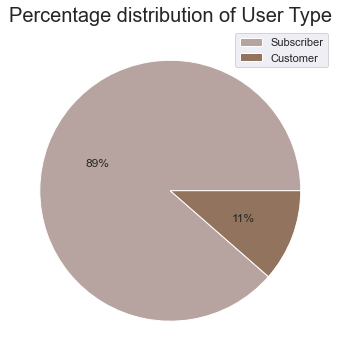

In [22]:
# get user type and percentage distribution
data=GetPercent('user_type')

# plotting data on chart
CreatePieChart(data[0],data[1],'User Type')
# displaying chart
plt.show()


We have alot more subscribers than Customers

#### Which gender uses the biking system more?

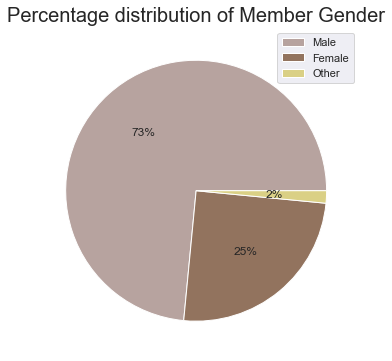

In [23]:
# get user gender and percentage distribution
data=GetPercent('member_gender')

# plotting data on chart
CreatePieChart(data[0],data[1],'Member Gender')

# displaying chart
plt.show()

The **male gender** mostly use the biking system.

In [52]:
def CreateBarPlot(df,y,x,title, ax=None, order=None,hue=None,palette=None):
    
    sns.barplot(data=df, y=y, x=x,color = "indigo",ax=ax,order=order,hue=hue,palette=palette);
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(x,fontsize=15)
    plt.ylabel(y,fontsize=15)
    plt.title(title,fontsize=25)
    
  

#### How many stations are there and which stations operate the most either to begin or end a trip as well as the station with the least activity?

There are 348 bike stations


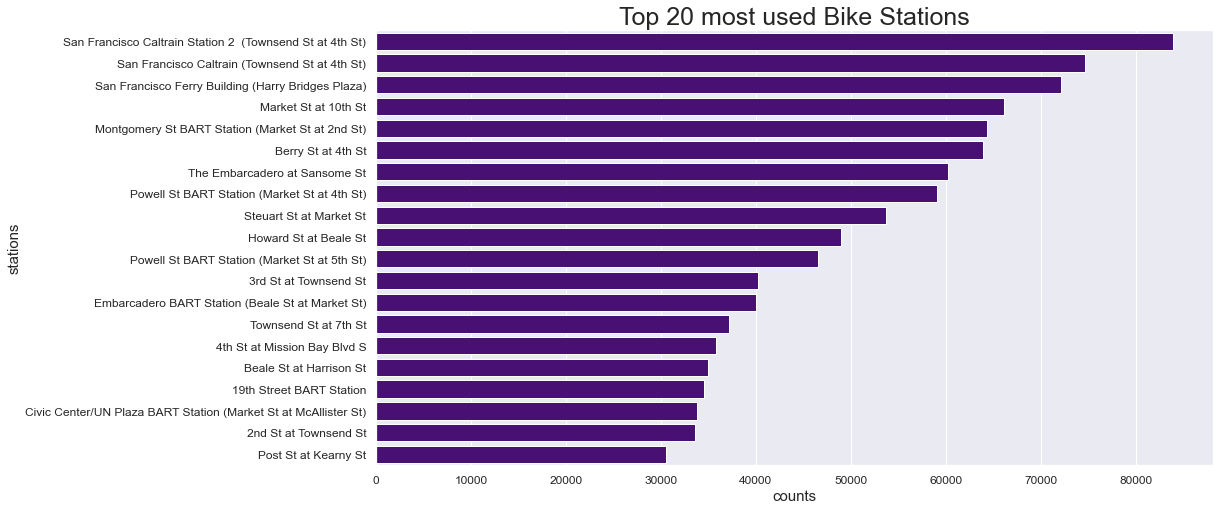

In [53]:
df = pd.DataFrame({'stations': list(trip_data['start_station_name'])+list(trip_data['end_station_name'])
                   })
df=df.stations.value_counts()
df=df.rename_axis('stations').reset_index(name='counts')

print('There are {} bike stations'.format(df.stations.nunique()))
sns.set(font_scale=1)
plt.figure(figsize=[15, 8])
CreateBarPlot(df[:20],'stations','counts',"Top 20 most used Bike Stations", ax=None, order=None)

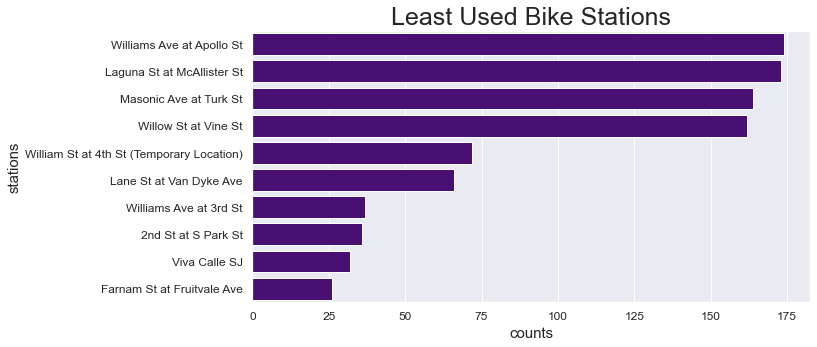

In [26]:
sns.set(font_scale=1)
plt.figure(figsize=[10, 5])
CreateBarPlot(df[-10:],'stations','counts',"Least Used Bike Stations", ax=None, order=None)

**San Francisco Caltrain Station 2** is the most used pickup or drop off bike station in SanFransisco with about 80 thousands counts of bike activity, which is followed by **San Francisco Caltrain (Townsend St at 4th St)**  with about 75 thousand counts. **2nd St at S Park St**, **Viva Calle SJ**, and **Farnam St at Fruitvale Ave** are the stations with the least biking activity.

## Bivariate Exploration

We will start by plotting a heatmap to get an overview of numerical variables that are correlated before further answering other questions.

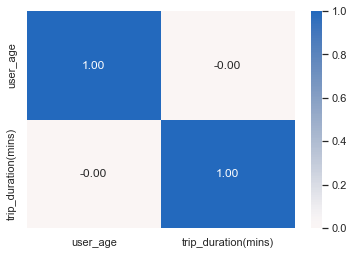

In [27]:
sns.heatmap(trip_data[['user_age','trip_duration(mins)']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

There is no correlation at all with them, we will now move further to explore other variables to get more insight 

#### On average what month and days has the longest duration covered in trips?

In [28]:
# Create and sort datafraem for average trip duration per months
df=trip_data[['trip_duration(mins)','month','day_of_Week']].groupby(['month','day_of_Week']).mean()
df=df.reset_index()
df=df.sort_values(by='trip_duration(mins)')


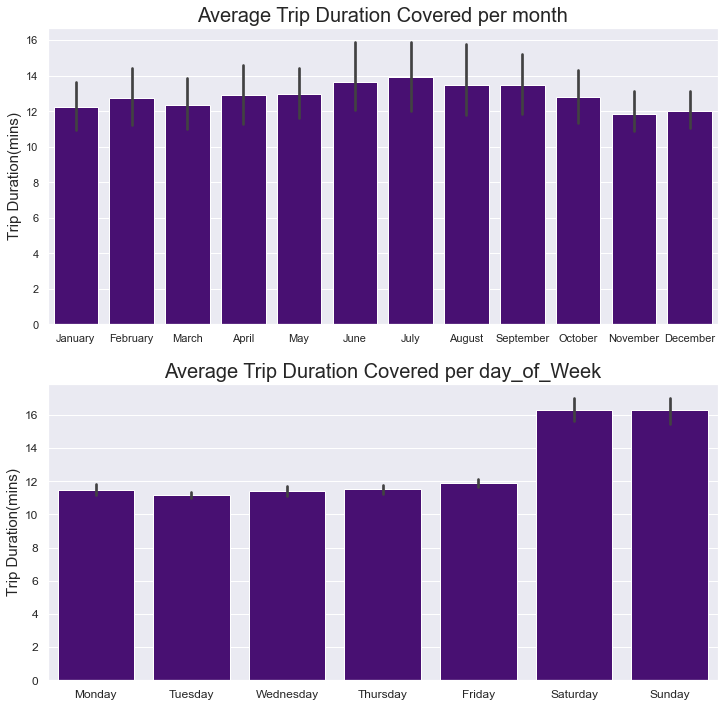

In [29]:
fig, ax = plt.subplots(nrows=2, figsize = [12,12])
x=['month','day_of_Week']
order=[['January','February','March','April','May','June','July','August','September','October','November','December'],
      ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
default_color = sns.color_palette()[0]
# Create bar subplots 
for i in range (2):
    CreateBarPlot(df,'trip_duration(mins)',x[i],'Average Trip Duration Covered per {}'.format(x[i]), ax=ax[i], order=order[i])
    ax[i].set_title('Average Trip Duration Covered per {}'.format(x[i]), fontsize=20)
    ax[i].set(xlabel=None);
    ax[i].set_ylabel('Trip Duration(mins)', fontsize=15)


**June till September** shows the longest average trip duration, which can be seen that these long trips mostly fall on **weekends**.

#### What age group averagely go on the farthest trips?


In [30]:
def age_cat(x):
    if x>=20 and x<30:
        return "20-29"
    elif x>=30 and x<40:
        return "30-39"
    elif x>=40 and x<50:
        return "40-49"
    elif x>=50 and x<60:
        return "50-59"
    elif x>=60 and x<70:
        return "60-69"
    elif x>=70:
        return "70 and above"

trip_data['Age_category']=trip_data['user_age'].apply(lambda x: age_cat(x))

In [31]:
m=trip_data[trip_data['user_age']<81]
df=m[['trip_duration(mins)','Age_category']].groupby(['Age_category']).mean()
df=df.reset_index()
df=df.sort_values(by='trip_duration(mins)')
df

,Age_category,trip_duration(mins)
2,40-49,11.761100632
5,70 and above,11.876634699
1,30-39,12.209659400
3,50-59,12.822845144
0,20-29,13.134915266
4,60-69,13.748909701


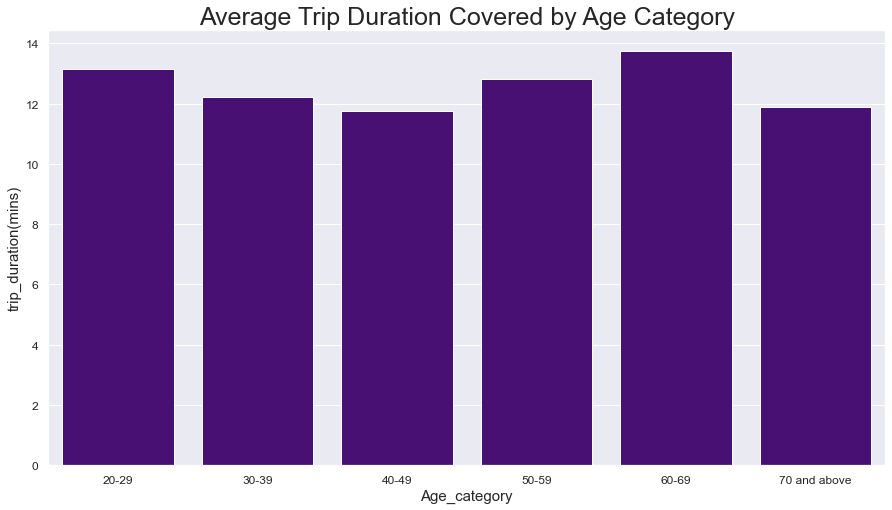

In [32]:
sns.set(font_scale=1)
order=['20-29','30-39','40-49','50-59','60-69','70 and above']
plt.figure(figsize=[15, 8])
CreateBarPlot(df,"trip_duration(mins)",'Age_category',"Average Trip Duration Covered by Age Category", order=order)



There is no correlations between age and trip durations.

## Multivariate Exploration

We can further dive in to see of which usertype and genders partake more in long trips

In [33]:
# Custom Function to  craete facetgrid
def CreateFacetGrid(font_scale,size,df,title,plottype, col,x,y=None,hue=None,col_wrap=3,color=None,palette=None,legend_title=None,col_order=None):
    df=df.reset_index()
    df=df.sort_values(by='trip_duration(mins)')

    sns.set(font_scale=font_scale)
    g = sns.FacetGrid(data = df, col = col,col_order=col_order,size = size,col_wrap=col_wrap)
    g.fig.suptitle(title);
    if hue==None and plottype=='countplot':
        g.map(sns.countplot, x, palette=palette)
    else:
        g.map(sns.barplot, x, y,hue, palette=palette)
    g.add_legend(title=legend_title); 
    return g

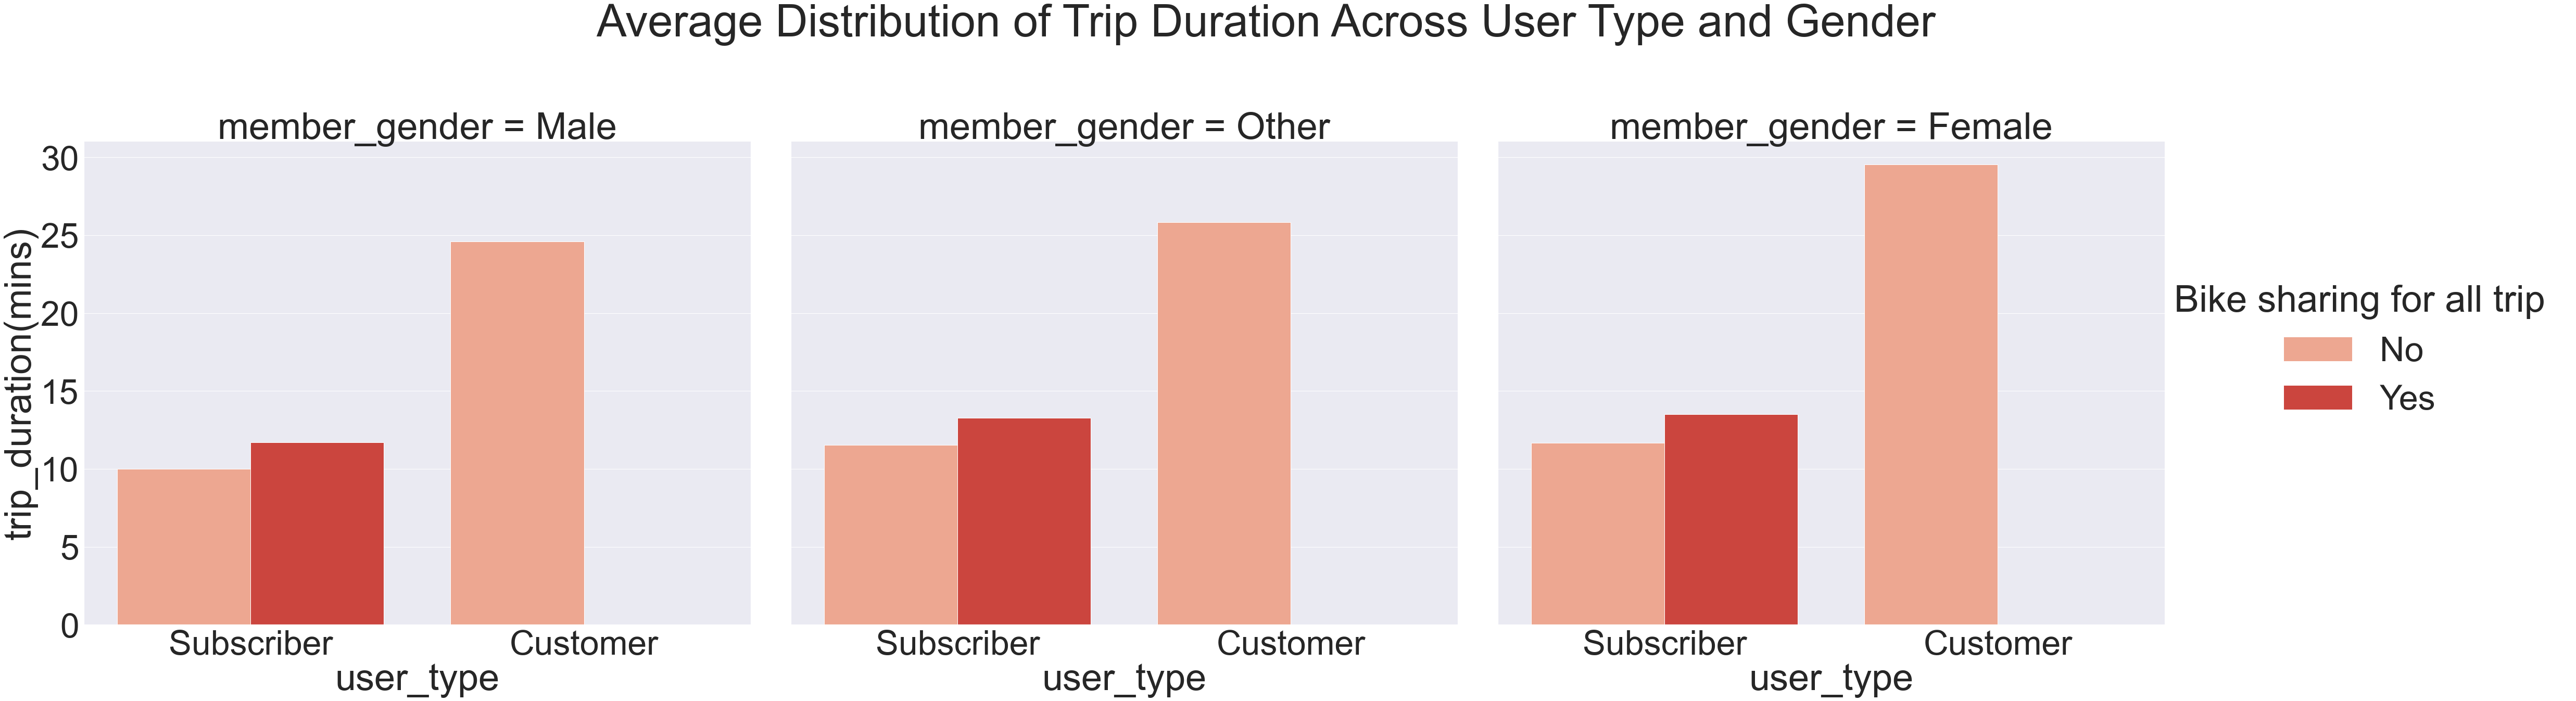

In [34]:
# Group data by usertype and gender
df=trip_data[['trip_duration(mins)','user_type','bike_share_for_all_trip','member_gender']].groupby(['user_type','bike_share_for_all_trip','member_gender']).mean()

title='Average Distribution of Trip Duration Across User Type and Gender'
legend_title='Bike sharing for all trip'
xticks=['Subscriber','Customer']

# Create facet grid

CreateFacetGrid(6,20,df,title,'barplot', 'member_gender','user_type','trip_duration(mins)',hue='bike_share_for_all_trip',palette='Reds',legend_title=legend_title)



From the above plots, **Female users** tend to go on longer trips than other genders. Also **customer user types** go for longer trips and these customer user type **do not partake in bike sharing**.

#### What hours of the day is the most active?

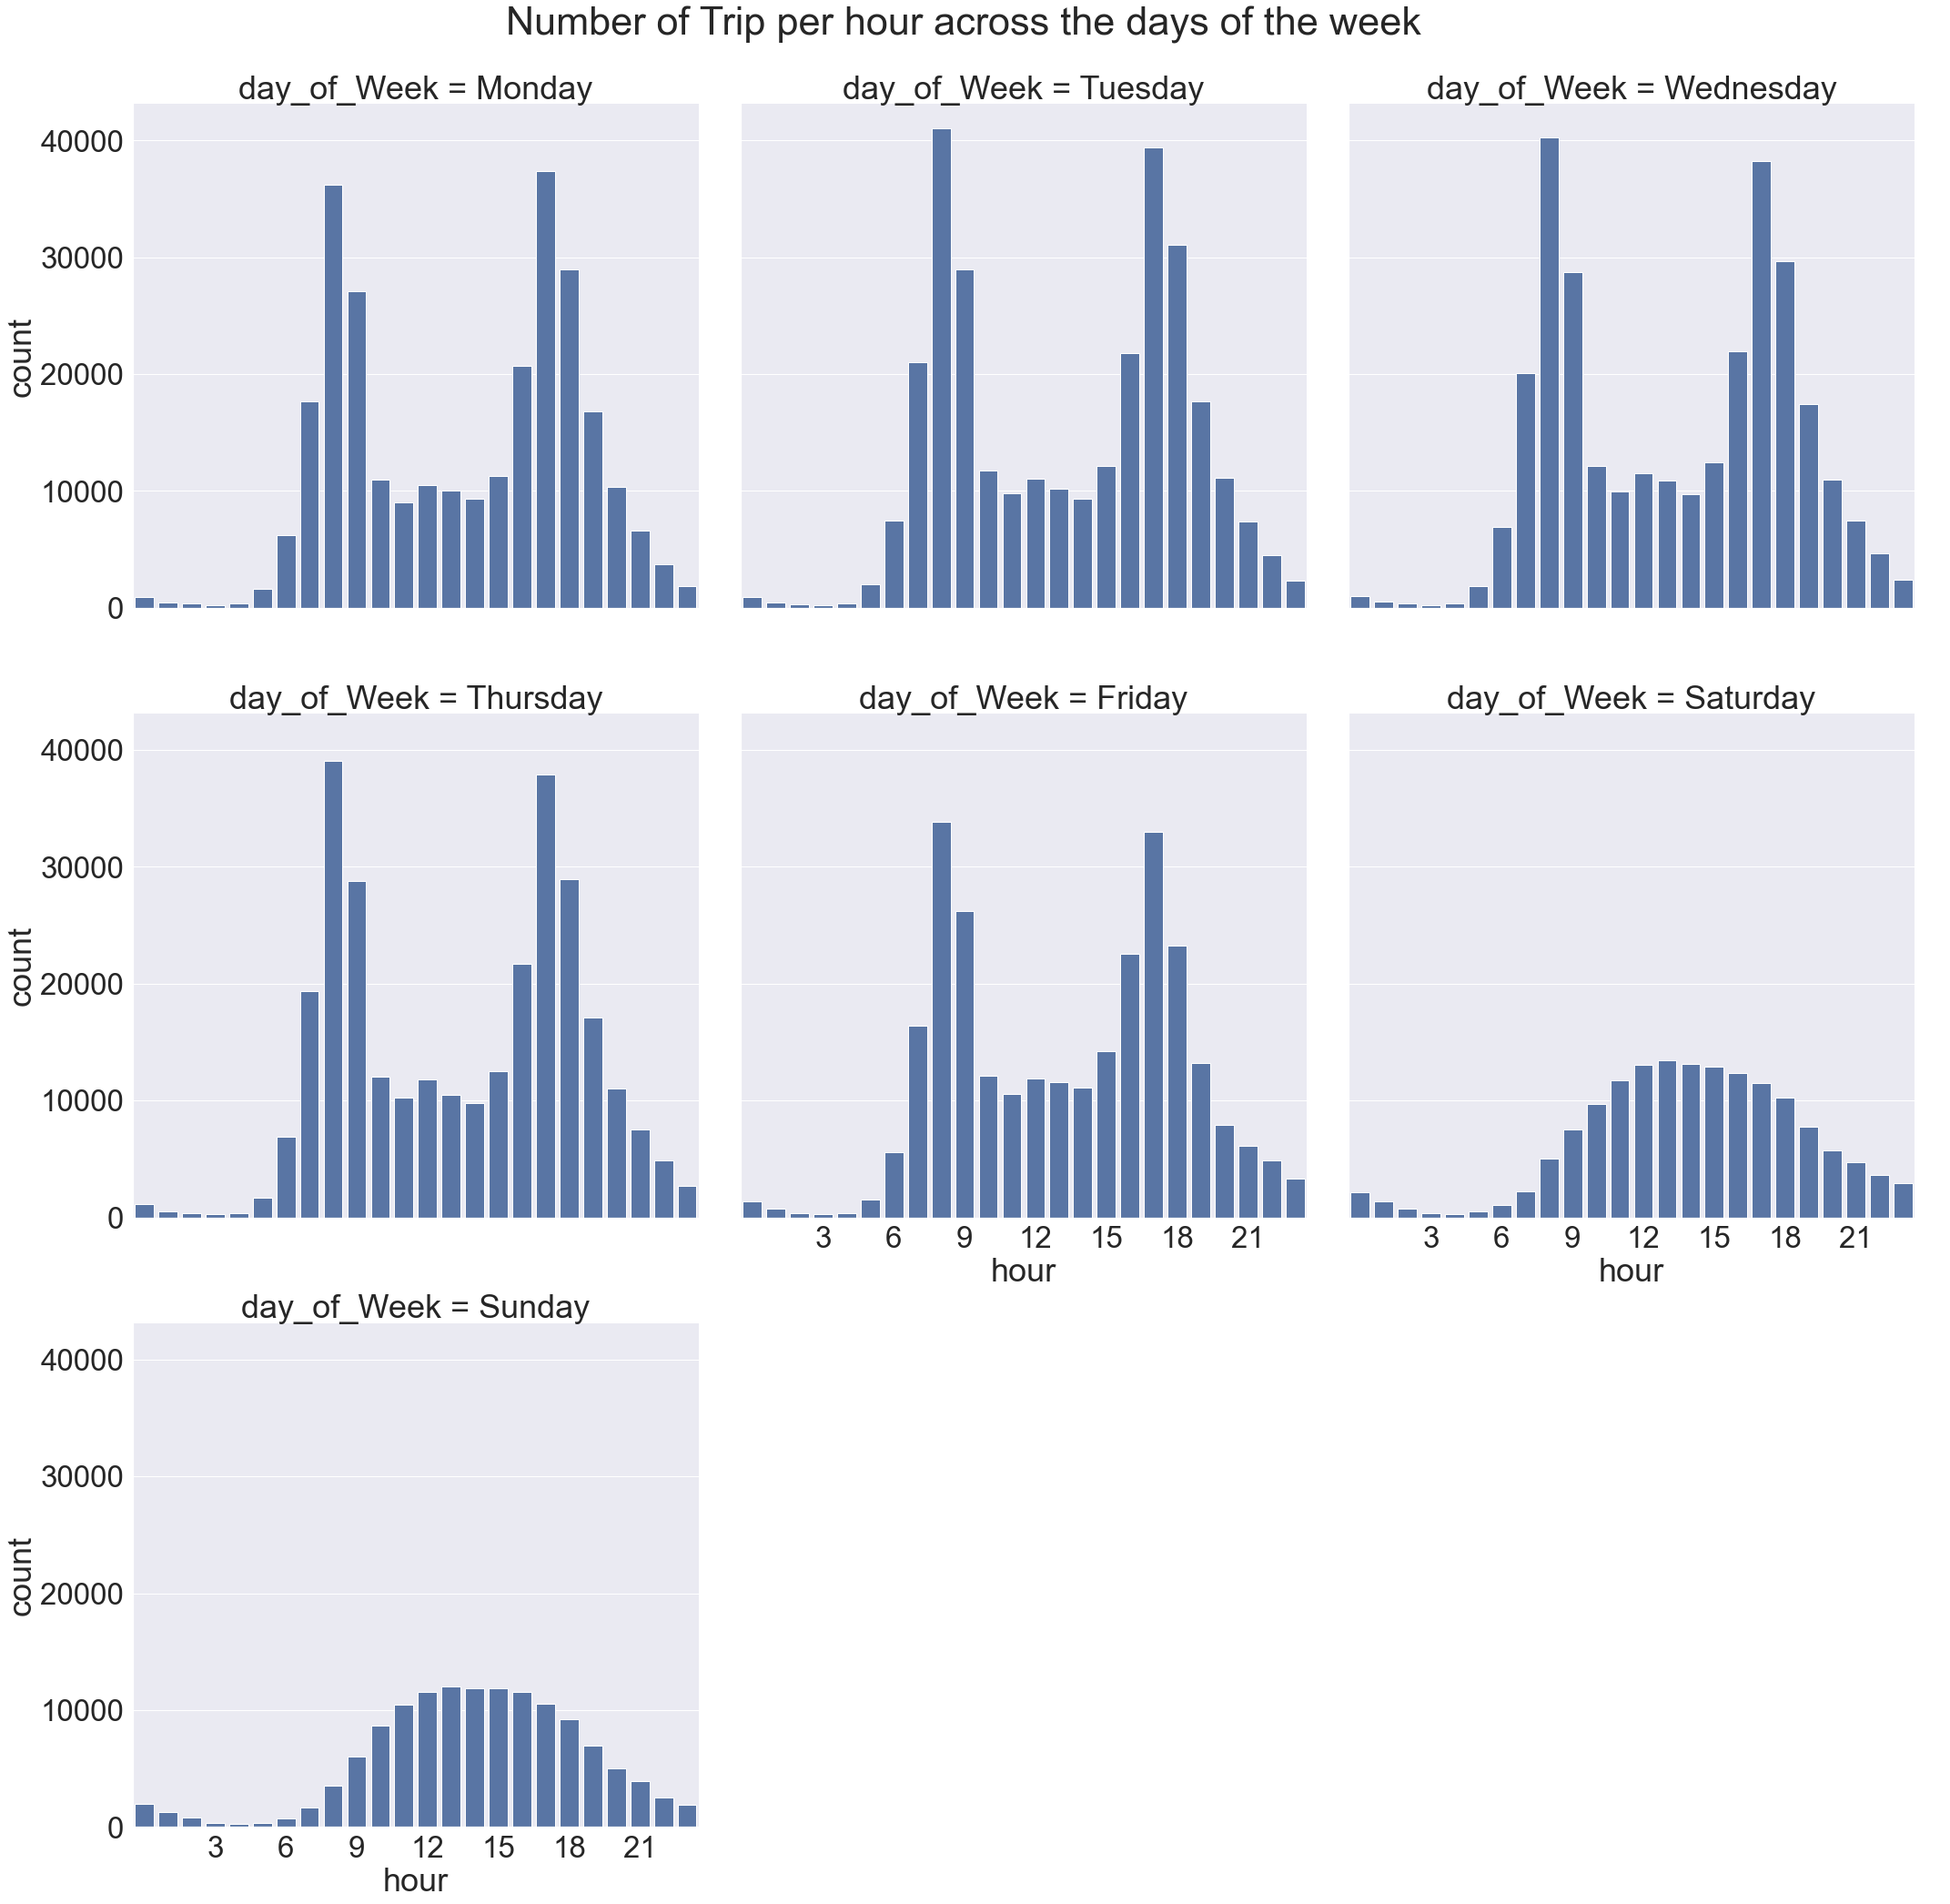

In [35]:
# Group data by hour and day of teh week

df=trip_data[['trip_duration(mins)','day_of_Week','hour']].groupby(['hour','day_of_Week']).mean()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

title='Number of Trip per hour across the days of the week'
xticks=[3,6, 9,12,15, 18,21]

# Create facet grid

g=CreateFacetGrid(3,10,trip_data,title,'countplot', 'day_of_Week','hour','trip_duration(mins)',col_wrap=3,color='blue',col_order=cats)
g.set(xticks=xticks)

The plots for the weekdays is bimodal which implies we have more trips between **7 to 9 hours of the morning** and around **16 hours and 18hours in the evenings**. However during the weekends, We observe the plots to be a bit bimodal. Most trips happen between 11 to 18 hours of the day. 

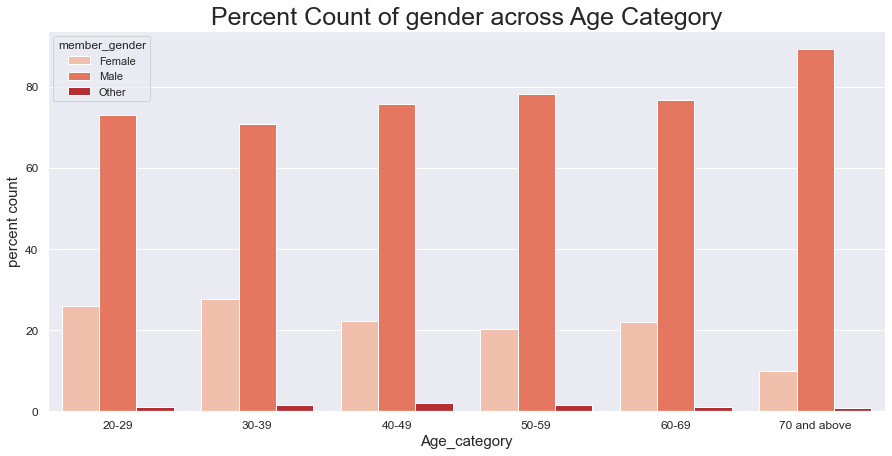

In [54]:

df=trip_data[['user_type','Age_category','member_gender']].groupby(['user_type','member_gender','Age_category']).count()
df2=trip_data.groupby(['Age_category','member_gender'])['start_time'].count()
df2=df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
df2.rename(columns = {'start_time':'percent count'}, inplace = True)

sns.set(font_scale=1)
order=['20-29','30-39','40-49','50-59','60-69','70 and above']
plt.figure(figsize=[15, 7]);


CreateBarPlot(df2,'percent count',"Age_category","Percent Count of gender across Age Category", order=order,hue='member_gender',palette='Reds')


Users above 69 years have the most percentgae of male in terms of age categories. This plot reconfirms the majority of users are men.